# Text Preprocessing

## Cleaning & Tokenization

In [ ]:
import re, nltk
from nltk.corpus   import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [w for w in tokens if w not in stop_words]

## Stemming vs Lemmatization

**Stemming**
- Definição: Stemming é o processo de reduzir uma palavra à sua forma base ou raiz, removendo sufixos e prefixos. O resultado pode não ser uma palavra válida no idioma.
- Exemplo: As palavras "correndo," "corredor" e "correu" podem ser reduzidas a "corr".
- Método: Utiliza algoritmos como o Porter Stemmer, que aplicam um conjunto de regras para remover afixos.
- Prós: É mais rápido e simples.
- Contras: Pode ser menos preciso, pois pode gerar palavras inexistentes.

**Lematização**
- Definição: Lematização é o processo de reduzir uma palavra à sua forma base ou de dicionário, conhecida como lema. Considera o contexto e a parte do discurso da palavra.
- Exemplo: As palavras "correndo" e "correu" seriam reduzidas a "correr," mas "melhor" seria reduzido a "bom."
- Método: Utiliza um vocabulário e análise morfológica das palavras, frequentemente requerendo um dicionário.
- Prós: É mais precisa e produz palavras válidas.
- Contras: É mais lenta e complexa.

**Comparação**
- Precisão: A lematização é geralmente mais precisa que o stemming.
- Velocidade: O stemming é mais rápido e simples.
- Resultado: A lematização produz palavras válidas, enquanto o stemming pode produzir palavras inexistentes.

In [ ]:
# Stemming with NLTK
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('running') # 'run'

'run'

In [ ]:
# Lemmatization with spaCy
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('I am running in the park')
[token.lemma_ for token in doc] # ['I', 'be', 'run', 'in', 'the', 'park']

['I', 'be', 'run', 'in', 'the', 'park']

**Preprocessing Tips**

- Always lowercase text for consistency
- Remove stopwords for topic modeling, but keep them for sentiment analysis
- Use lemmatization over stemming when meaning preservation is important
- Consider domain-specific preprocessing (e.g., hashtags for social media)

# Feature Extraction

## Bag of Words

**Bag of Words (BoW)**

- Definição: Bag of Words é uma técnica de representação de texto em que um documento é transformado em um vetor de palavras, ignorando a ordem e a estrutura gramatical. Cada palavra única no documento é considerada uma característica.
- Processo:
  1. Tokenização: Dividir o texto em palavras individuais (tokens).
  2. Construção do vocabulário: Criar uma lista de todas as palavras únicas presentes no texto.
  3. Contagem de frequência: Contar quantas vezes cada palavra aparece no texto.

**Vetorização**
- Definição: Vetorização é o processo de transformar o texto em uma representação numérica (vetor) que pode ser usada por algoritmos de aprendizado de máquina.
- Método:
  1. Criação do vetor: Cada documento é representado por um vetor onde cada posição corresponde à frequência de uma palavra do vocabulário.
  2. Exemplo: Se o vocabulário contém as palavras ["casa", "carro", "livro"], e o documento é "casa carro casa", o vetor seria [2, 1, 0], indicando que "casa" aparece duas vezes, "carro" uma vez, e "livro" nenhuma vez.

**Aplicações**
- Classificação de texto: Usado para categorizar documentos em diferentes classes.
- Análise de sentimentos: Determinar o sentimento expresso em um texto.
- Recuperação de informação: Encontrar documentos relevantes em grandes conjuntos de dados.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'Natural language processing.',
    'I love learning about NLP.'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
# Get feature names & document vectors
vectorizer.get_feature_names_out()
X.toarray()

array([[0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 0]])

## TF-IDF

**TF-IDF (Frequência de Termo-Inverso da Frequência de Documento)**

- Definição: TF-IDF é uma técnica de vetorização de texto que avalia a importância de uma palavra em um documento em relação a um conjunto de documentos (corpus). Combina duas métricas: a frequência do termo (TF) e a frequência inversa do documento (IDF).

- Componentes

  1. Frequência de Termo (TF):

    - Definição: A frequência de termo é o número de vezes que uma palavra aparece em um documento.

  2. Frequência Inversa de Documento (IDF):

    - Definição: A frequência inversa de documento mede a importância de uma palavra em todo o corpus. Palavras comuns em muitos documentos recebem um valor baixo de IDF.

- Aplicações

  - Classificação de texto: Usado para categorizar documentos com base na importância das palavras.
  - Busca de informação: Melhorar a relevância dos resultados de busca.
  - Análise de sentimentos: Identificar palavras-chave que indicam sentimentos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# Get feature names & document vectors
vectorizer.get_feature_names_out()
X.toarray()

array([[0.        , 0.57735027, 0.        , 0.        , 0.57735027,
        0.        , 0.57735027],
       [0.5       , 0.        , 0.5       , 0.5       , 0.        ,
        0.5       , 0.        ]])

## Word Embeddings

**Word Embeddings**

- Definição: Word embeddings são representações vetoriais de palavras que capturam seus significados semânticos. Diferente de técnicas como Bag of Words e TF-IDF, que representam palavras como vetores esparsos, word embeddings representam palavras em vetores densos de dimensões menores.

Como Funcionam

- Treinamento: Word embeddings são treinados em grandes corpora de texto usando algoritmos como Word2Vec, GloVe ou FastText. Esses algoritmos aprendem a representar palavras de forma que palavras com significados semelhantes tenham vetores próximos no espaço vetorial.
- Dimensionalidade: Cada palavra é representada por um vetor de várias dimensões (geralmente entre 100 e 300 dimensões).

Algoritmos Populares

1. Word2Vec:

  - Modelos: Skip-gram e Continuous Bag of Words (CBOW).
  - Objetivo: Prever palavras contextuais próximas ou prever a palavra central a partir de palavras contextuais.

2. GloVe (Global Vectors for Word Representation):

  - Baseado em estatísticas: Utiliza a coocorrência global de palavras em um corpus.
  - Objetivo: Capturar relações semânticas entre palavras.

3. FastText:

  - Subpalavras: Considera subpalavras (n-grams) para capturar morfologia.
  - Vantagem: Melhor para lidar com palavras raras e novas.

Aplicações

- Processamento de Linguagem Natural (PLN): Usado em tarefas como tradução automática, análise de sentimentos, e classificação de texto.
- Sistemas de Recomendação: Melhorar a recomendação de itens com base em descrições textuais.
- Chatbots e Assistentes Virtuais: Melhorar a compreensão e geração de linguagem natural.

In [ ]:
!pip install --upgrade numpy -q
!pip install --upgrade gensim -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from gensim.models import Word2Vec

sentences = [['natural', 'language'], ['machine', 'learning']]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

# Get vector & similar words
vector = model.wv['natural']
similar = model.wv.most_similar('natural', topn=5)

**When to Use Each Feature Type**

- BoW/TF-IDF: Text classification, document clustering
- Word Embeddings: Semantic tasks, text similarity, transfer learning
- Contextual Embeddings: Advanced tasks requiring context understanding

# Text Classification

## Basic Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn.pipeline                import Pipeline

In [ ]:
X_train = ['I love this product', 'This is terrible', 'This is perfect']
y_train = ['positive', 'negative', 'positive']

text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

text_clf.fit(X_train, y_train)
text_clf.predict(['This was awesome']) # ['positive']

array(['positive'], dtype='<U8')

## Using Transformers

In [ ]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [ ]:
result = classifier("I've been waiting for this movie!")
result # [{'label': 'POSITIVE', 'score': 0.9998}]

[{'label': 'POSITIVE', 'score': 0.9878816604614258}]

|Classification Task |Recommended Approach|
|------------|------------|
|Sentiment Analysis|VADER (rule-based) or fine-tuned BERT|
|Topic Classification|TF-IDF + SVM or DistilBERT|
|Intent Recognition|Fine-tuned RoBERTa|
|Spam Detection|TF-IDF + Naive Bayes|

# Named Entity Recognition

**Reconhecimento de Entidades Nomeadas (NER)**

- Definição: NER é uma técnica de processamento de linguagem natural (PLN) que identifica e classifica entidades mencionadas em um texto. Essas entidades podem ser pessoas, organizações, locais, datas, valores, entre outras.

Como Funciona

- Processo:
  1. Tokenização: Dividir o texto em palavras ou tokens.
  2. Identificação de Entidades: Usar modelos de aprendizado de máquina para identificar palavras ou frases que representam entidades.
  3. Classificação: Atribuir uma categoria a cada entidade identificada (por exemplo, pessoa, organização, local).

Algoritmos e Modelos

- Modelos Baseados em Redes Neurais: Modelos como BiLSTM-CRF e transformers (por exemplo, BERT) são frequentemente usados para NER devido à sua capacidade de capturar contextos complexos.
- Embeddings Contextuais: Utilizar embeddings como Word2Vec, GloVe ou FastText para representar palavras em vetores densos que capturam significados semânticos.

Aplicações

- Extração de Informação: Usado para extrair informações estruturadas de textos não estruturados.
- Análise de Sentimentos: Identificar entidades mencionadas em textos e analisar os sentimentos associados.
- Sistemas de Busca: Melhorar a relevância dos resultados de busca ao identificar entidades chave.

## Exemplo de NER

## spaCy NER

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp('Apple is buying U.K. startup for $1 billion')

for ent in doc.ents:
  print(ent.text, ent.label_)
# Apple ORG
# U.K. GPE
# $1 billion MONEY

Apple ORG
U.K. GPE
$1 billion MONEY


## Transformers NER

In [ ]:
from transformers import pipeline

ner = pipeline('ner')

text = 'My name is Sarah and I work at Google in London'
ner_results = ner(text)
ner_results # [{'entity': 'I-PER', 'score': 0.99, 'word': 'Sarah'}, ...]

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity': 'I-PER',
  'score': 0.9986339,
  'index': 4,
  'word': 'Sarah',
  'start': 11,
  'end': 16},
 {'entity': 'I-ORG',
  'score': 0.9985827,
  'index': 9,
  'word': 'Google',
  'start': 31,
  'end': 37},
 {'entity': 'I-LOC',
  'score': 0.99839896,
  'index': 11,
  'word': 'London',
  'start': 41,
  'end': 47}]

**Common Entity Types**

- PER/PERSON: People names
- ORG: Organizations, companies
- LOC/GPE: Locations, geopolitical entities
- DATE/TIME: Temporal expressions
- MONEY: Monetary values

# Sentiment Analysis

## TextBlob

In [ ]:
from textblob import TextBlob

text = 'The movie was absolutely amazing!'
blob = TextBlob(text)

# Polarity: -1 (negative) to 1 (positive)
print(blob.sentiment.polarity) # 0.8

# Subjectivity: 0 (objective) to 1 (subjective)
print(blob.sentiment.subjectivity) # 0.75

0.7500000000000001
0.9


## VADER Sentiment

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

text = 'The movie was absolutely amazing!'
scores = sia.polarity_scores(text)

print(scores) # {'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8316}

{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.6581}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Sentiment Analysis Tips**

- Rule-based approaches work well for straightforward text
- Consider using domain-specific models for specialized content
- ML/DL approaches handle context, sarcasm, and negation better
- Use BERT variants for state-of-the-art performance

# Topic Modeling

## LDA with Gensim

O **Latent Dirichlet Allocation** (LDA), ou **Alocação Latente de Dirichlet**, é um modelo estatístico utilizado para identificar tópicos ocultos em um conjunto de documentos. Este modelo é amplamente aplicado em áreas como processamento de linguagem natural, mineração de texto e análise de dados.

Como funciona o LDA:
1. Distribuição de tópicos em documentos: Cada documento é considerado uma mistura de vários tópicos.
2. Distribuição de palavras em tópicos: Cada palavra em um documento é atribuída a um tópico específico.

Por exemplo, em um conjunto de documentos sobre ciência, um tópico pode incluir palavras como “experimento”, “hipótese” e “resultado”. O modelo atribui probabilidades para a presença de cada tópico em cada documento e a probabilidade de cada palavra pertencer a cada tópico.

In [ ]:
from gensim.corpora import Dictionary
from gensim.models  import LdaModel

docs = [
    'Machine learning is a subset of AI',
    'NLP is used for text analysis'
    ]

# Tokenize
tokenized_docs = [doc.lower().split() for doc in docs]

# Create dictionary & corpus
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,
    passes=10
    )

# Print topics
topics = lda_model.print_topics()
for topic in topics:
  print(topic)

(0, '0.125*"is" + 0.124*"text" + 0.124*"used" + 0.124*"nlp" + 0.124*"analysis" + 0.124*"for" + 0.042*"a" + 0.042*"machine" + 0.042*"of" + 0.042*"learning"')
(1, '0.115*"is" + 0.115*"subset" + 0.115*"ai" + 0.115*"learning" + 0.115*"of" + 0.115*"machine" + 0.115*"a" + 0.039*"for" + 0.039*"analysis" + 0.039*"nlp"')


**Topic Modeling Approaches**

- LDA: Classic probabilistic approach
- NMF: Non-negative Matrix Factorization
- BERTopic: Leverages BERT embeddings
- Top2Vec: Document embeddings + clustering

# Advanced Techniques

## Text Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline('summarization')

long_text = '''Pope Francis, born Jorge Mario Bergoglio in Argentina, became the 266th pope of the Catholic Church in 2013. Known for his humility and progressive views, he has focused on social justice, environmental issues, and outreach to marginalized communities. His papacy has been marked by efforts to reform the Church and promote inclusivity.'''

summary = summarizer(long_text, max_length=50, min_length=15)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


 Pope Francis became the 266th pope of the Catholic Church in 2013 . Known for his humility and progressive views, he has focused on social justice, environmental issues, and outreach to marginalized communities .


## Translation

In [ ]:
from transformers import pipeline

translator = pipeline('translation_en_to_fr')

translation = translator('Hello, how are you?')
print(translation[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Bonjour, comment êtes-vous?


## Question Answering

In [ ]:
from transformers import pipeline

qa = pipeline('question-answering')

context = 'Python is a programming language created by...'
question = 'Who created Python?'

result = qa(question=question, context=context)
print(result['answer'])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


...


|Task|Beginner Approach|Advanced Approach|
|------------|------------|------------|
|Summarization|Extractive (TextRank)|Abstractive (T5, BART)|
|Translation|Pre-trained pipeline|Custom Seq2Seq models|
|Q&A|Rule-based systems|Fine-tuned BERT/T5|
|Text Generation|Markov Chains|GPT models|

# NLP Project Evaluation & Tips

**Evaluation Metrics by Task**

- Classification: Accuracy, F1-score, Precision, Recall
- NER: F1-score, Precision, Recall (by entity type)
- Summarization: ROUGE-N, ROUGE-L, BLEU
- Translation: BLEU, METEOR, TER
- Generation: Perplexity, human evaluation

**Best Practices for NLP Projects**

- Start simple: Try basic models before complex ones
- Clean your data thoroughly: Good preprocessing is crucial
- Consider context: Many NLP problems need contextual understanding
- Leverage pre-trained models: Often outperform models trained from scratch
- Handle class imbalance: Use oversampling or adjusted weights
- Use cross-validation: Especially for small datasets
- Evaluate properly: Choose appropriate metrics for your task

# Latent Dirichlet Allocation (LDA) | Gensim

Para o LDA, entramos com uma quantidade M de documentos, que em si geram N palavras, que são tratadas no modelo gerando K tópicos, que podem ser entendidos como clusters de palavras.

Demais outputs que se extraem do modelo, além dos tópicos em si, são a frequência de palavras por tópicos, representado na figura pelo psi.

Outro é a distribuição dos tópicos para cada documento phi, ou seja, quanto percentualmente aquele tópico é relevante para documento.

Já os principais parâmetros para o modelo em si, α que indica de quantos tópicos os documentos são compostos, que permite ou não uma distribuição de tópicos por documento mais específica — quanto maior, maior a quantidade de tópicos, mais específica a distribuição; e o β que indica de quantas palavras os tópicos são compostos, que permite ou não uma distribuição de palavras por tópico mais específica — quanto maior, maior a quantidade de palavras, mais específica a distribuição.

**Fluxo**

- Tokenização dos tweets
- Redução dos tokens para uma seleção de 10 mil tokens mais significativos de acordo com uma amostra de 5 dias consolidados, significância calculada manualmente
- Remoção de caracteres especiais e de acentos através de regex e unicode
- Remoção de emojis (usando a biblioteca [emoji](https://pypi.org/project/emoji/))
- Remoção de stopwords
- Aplicação de modelo Bigram
- Aplicação de modelo Trigram
- Remoção novamente de stopwords

Não foi aplicado nem o processo de stemming nem de lemmatização.

O processo de lemmatização não apresenta bons resultados em português, independente da biblioteca utilizada, resultando em algo similar a um processo de stemming.

Já o stemming não resultaria em bons tokens, já que um dos objetivos finais da análise é criar word clouds para cada um dos dias que existia dataset.

Outro ponto é que ao longo do processamento a lista de stopwords foi aumentando conforme cada dia de processamento.

Não existe biblioteca com inputs suficientes para ter uma lista de stopwords completa (lista de palavras com significado vazio que são removidas do processamento para não poluírem os resultados da modelagem), ou uma biblioteca que permitisse realizar um processo de stemm ou lemma com precisão.

Os resultados não foram agradáveis com as soluções disponíveis, como nltk, inclusive com as soluções desenvolvidas específicas para a língua, como a SnowBall.

No final, para realizar a análise, foi criada uma lista de stop words manualmente pelo spacy.

In [ ]:
!python -m spacy download pt_core_news_sm
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 108.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 71.0 MB/s eta 0:00:00


In [ ]:
# Bibliotecas gerais
import sys
import os
from pathlib                    import Path
import re
import numpy                    as np
import pandas                   as pd
from pprint                     import pprint
from tqdm                       import tqdm
import pt_core_news_sm

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora           as corpora
from gensim.utils               import simple_preprocess
from gensim.models              import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

# Plots
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot        as plt
import matplotlib.colors        as mcolors
from wordcloud                  import WordCloud, STOPWORDS

%matplotlib inline

In [ ]:
texto = '''Pope Francis passed away on Easter Monday, April 21, 2025, at the age of 88. He died at his residence, the Domus Sanctae Marthae in Vatican City, following a stroke and irreversible heart failure. His death was announced by Cardinal Kevin Farrell, the Camerlengo, in a broadcast by Vatican Media. Pope Francis had served as the head of the Catholic Church since his election on March 13, 2013. Known for his humility and efforts to make the Church more inclusive, he often clashed with world leaders over issues such as the rights of immigrants. Despite his health challenges, including chronic lung damage and mobility issues, he remained dedicated to his role and continued to engage with the public. His funeral is scheduled to take place on April 26, 2025, at St. Peter's Square in Vatican City. The papal conclave to elect his successor is expected to begin between May 6 and May 12, 2025. Pope Francis's legacy includes his commitment to living the values of the Gospel with fidelity, courage, and universal love, especially towards the poorest and most marginalized. His passing has prompted global tributes and reflections on his impactful life and service.'''

In [ ]:
# Assuming you want to treat the entire 'texto' as a single document
tokenized_texto = [texto.lower().split()]

# Now create the dictionary
id2word = corpora.Dictionary(tokenized_texto)

# Proceed with creating the corpus
corpus = [id2word.doc2bow(text) for text in tokenized_texto]

O **valor de coerência** mede, dentro de um único tópico, a coerência semântica das palavras dentro dele, utilizando a métrica de cossenos para sua similaridade, que vai de 0 a 1.

In [ ]:
# Função para determinar a melhor quantidade de tópicos para a modelagem

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
  coherence_values = []
  model_list = []
  for num_topics in tqdm(range(start, limit, step)):
    model = LdaMulticore(corpus, id2word=id2word, num_topics=5)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Colocando parâmetros na função
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texto, start=1, limit=10, step=1)

100%|██████████| 9/9 [00:02<00:00,  4.49it/s]


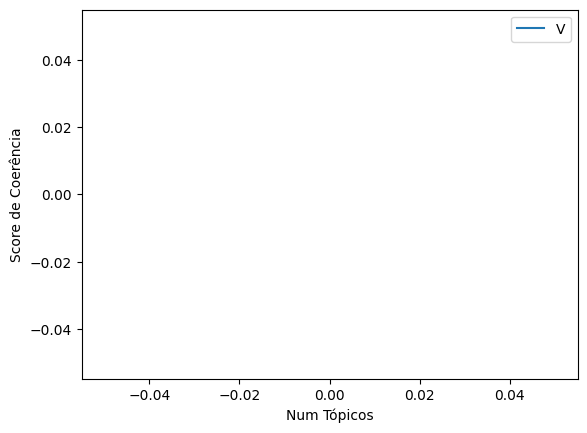

In [ ]:
# Mostrando visualmente a quantidade de tópicos
limit=5; start=0; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(("Valores de Coerência"), loc='best')
plt.show()

In [ ]:
# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
for m, cv in zip(x, coherence_values):
  print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))